# Web Scraping using Beautiful Soup and Pandas

----------------------------------------------------------------

Using Beautiful Soup to scrape the webpage : https://best-selling-cars.com/europe/2019-full-year-europe-best-selling-car-manufacturers-and-brands  and find out the best selling car models (by numbers) in Europe in the year 2019 and convert the result to a pandas dataframe 


Import the required libraries

In [145]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt

Get the content of the webpage using the <b>requests</b> library.

In [146]:
url = 'https://best-selling-cars.com/europe/2019-full-year-europe-best-selling-car-manufacturers-and-brands'
html_content = requests.get(url).text

Parse the content of the webpage using <b>Beautiful Soup</b>

In [147]:
soup = BeautifulSoup(html_content,"lxml")

In [148]:
#  print(soup.prettify)

We will use the soup object created above to get a list of tables in the page


In [149]:
tables = soup.find_all("table")
print(len(tables))

2


Out of the 2 tables on the webpage we are interested in the 2nd table : <b>Economic Freedom</b> <br> We will need the index 1 of the tables list . <br> After getting to the required table we will remove the headers  from the table and save the rest of the table as a pandas dataframe

In [150]:
second_table = tables[1]

Each row in the table is represented by <b>tr</b> tag . The first row consists of the header and the rest of the rows are the data which will be used to populate the dataframe

In [151]:
body_of_table = second_table.find_all('tr')

In [152]:
largest_car_manufacturers = body_of_table[1:]

In [153]:
largest_car_manufacturers[1].find_all('td')

[<td>2</td>,
 <td>RENAULT</td>,
 <td>1,063,957</td>,
 <td>1,105,119</td>,
 <td>-3.7</td>]

This gives us the list of the rows of the table 

In [154]:

# loop through the rows of the table 

all_rows = []  # create a empty list to store the row entries 

for num in range(len(largest_car_manufacturers)):
    row = []
    
    for item in largest_car_manufacturers[num].find_all('td'):
        
        # item.text removes the tags from the entries
        # the regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        list_of_row_entries = re.sub("(\xa0)|(\n)|,","",item.text)
        
        #append aa to row - note one row entry is being appended
        row.append(list_of_row_entries)
    
    #for each row being added , we only need the 2nd and the 3rd item
    all_rows.append([row[1],row[2]])

In [155]:
all_rows

[['VOLKSWAGEN', '1769482'],
 ['RENAULT', '1063957'],
 ['FORD', '965070'],
 ['PEUGEOT', '964937'],
 ['MERCEDES', '902039'],
 ['BMW', '830862'],
 ['OPEL/VAUXHALL', '815683'],
 ['SKODA', '761761'],
 ['AUDI', '743042'],
 ['TOYOTA ', '741342'],
 ['FIAT', '659622'],
 ['CITROEN', '636843'],
 ['DACIA', '581543'],
 ['HYUNDAI', '563018'],
 ['SEAT', '507149'],
 ['KIA', '502841'],
 ['NISSAN', '394091'],
 ['VOLVO', '342579'],
 ['MAZDA', '256562'],
 ['MINI', '217185'],
 ['JEEP', '167118'],
 ['LAND ROVER', '151800'],
 ['MITSUBISHI', '148248'],
 ['HONDA', '122080'],
 ['SMART', '114616'],
 ['PORSCHE', '79624'],
 ['JAGUAR', '76826'],
 ['LANCIA/CHRYSLER', '58938'],
 ['LEXUS', '56055'],
 ['ALFA ROMEO', '53876'],
 ['Source: ACEA', '']]

In [124]:
# create a pandas dataframe using the data in all rows and providing column names as a list
df = pd.DataFrame(data = all_rows, columns = ['Brand','No_of_Cars_Sold'])


In [125]:
df.tail()

,Brand,No_of_Cars_Sold
26,JAGUAR,76826
27,LANCIA/CHRYSLER,58938
28,LEXUS,56055
29,ALFA ROMEO,53876
30,Source: ACEA,


In [141]:
# drop the last row
df = df.drop(30)

In [142]:
#convert the number of car solds to numeric column
df.No_of_Cars_Sold = pd.to_numeric(df.No_of_Cars_Sold)

Plot the data using pandas and matplotlib and save the fig as plot.png 

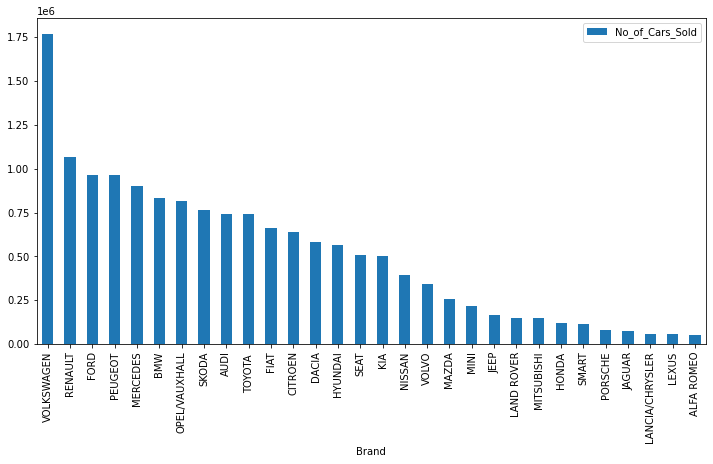

In [143]:

df.plot('Brand','No_of_Cars_Sold',kind='bar',figsize=(12,6))
plt.savefig('plot.png', dpi=150, bbox_inches='tight')

Save the dataframe as a CSV file

In [144]:
df.to_csv('Largest_car_manufacturers_in_Europe.csv')